# Проект: вариант 1
Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:

В первую очередь, его интересует показатель retention. Напишите функцию для его подсчета.
Помимо этого, в компании провели A/B тестирование наборов акционных предложений. На основе имеющихся данных определите, какой набор можно считать лучшим и на основе каких метрик стоит принять правильное решение.
Предложите метрики для оценки результатов последнего прошедшего тематического события в игре.

### Задание 1
Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

shared/problem1-reg_data.csv – данные о времени регистрации
shared/problem1-auth_data.csv – данные о времени захода пользователей в игру

Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

# Загружаем данные
auth_data = pd.read_csv('shared/problem1-auth_data.csv', sep=';')
reg_data = pd.read_csv('shared/problem1-reg_data.csv', sep=';')

In [5]:
# Проводим анализ данных
def check_data(df, df_name):
    
    """
    Проверяет данные в датасетах и отображает результаты для каждого из них отдельно.
    
    Аргументы:
        df(pd.DataFrame): Датасет для проверки.
        df_name(str): Имя датасета для отображения.
    
    Возвращает: 
        Информация о датасетах: размер, пропуски, дубликаты, уникальные значения, типы и описание данных, общая информация.
    """
    
    print(f"--- Проверка данных: {df_name} ---")
    print(f"Размеры данных: {df.shape}")
    
    print("\nПропуски:")
    if df.isna().sum().sum() > 0:
        print(df.isna().sum())
    else:
        print("Пропусков нет")
    
    print("\nДубликаты:")
    duplicated_count = df.duplicated().sum()
    if duplicated_count > 0:
        print(f"Найдено дубликатов: {duplicated_count}")
    else:
        print("Дубликатов нет")
    
    print("\nУникальные значения по столбцам:")
    print(df.nunique())
    
    print("\nТипы данных:")
    print(df.dtypes)
    
    print("\nОписание данных:")
    print(df.describe())
    print("-" * 40)
    
    print("\nОбщая информация:")
    df.info()
    
# Запускаем проверку данных, если это необходимо
perform_checks = input("Выполнить проверку данных? (y/n): ").strip().lower() == 'y'
if perform_checks:
    check_data(auth_data, "Данные авторизации (auth_data)")
    check_data(reg_data, "Данные регистрации (reg_data)")

Выполнить проверку данных? (y/n): y
--- Проверка данных: Данные авторизации (auth_data) ---
Размеры данных: (9601013, 2)

Пропуски:
Пропусков нет

Дубликаты:
Дубликатов нет

Уникальные значения по столбцам:
auth_ts    9180915
uid        1000000
dtype: int64

Типы данных:
auth_ts    int64
uid        int64
dtype: object

Описание данных:
            auth_ts           uid
count  9.601013e+06  9.601013e+06
mean   1.548778e+09  3.347198e+05
std    5.160527e+07  2.832669e+05
min    9.113822e+08  1.000000e+00
25%    1.528375e+09  9.599700e+04
50%    1.564577e+09  2.579210e+05
75%    1.585823e+09  5.190250e+05
max    1.600874e+09  1.110622e+06
----------------------------------------

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   auth_ts  int64
 1   uid      int64
dtypes: int64(2)
memory usage: 146.5 MB
--- Проверка данных: Данные регистрации (reg_data) ---
Размеры д

In [6]:
# С данными все хорошо. Поэтому можно переводить данные в подходящие нам временные форматы.
def process_timestamps(auth_data, reg_data):
    """
    Обрабатывает временные метки в двух наборах данных и объединяет их.
    Выполняет проверку и приведение временных столбцов к типу datetime.
    
    Аргументы:
        auth_data(pd.DataFrame): Данные авторизации.
        reg_data(pd.DataFrame): Данные регистрации.
    
    Возвращает:
        pd.DataFrame: Объединенные данные с обработанными временными метками, содержащие столбцы
                      'reg_datetime', 'auth_datetime', а также 'reg_year' и 'auth_year'.
    
    Примечания:
        - Для каждого набора данных производится проверка: если временной столбец имеет тип, отличный от datetime,
          то он преобразуется в тип datetime с учетом единиц времени 's' (секунды).
        - После этого извлекаются только даты (без времени), а также добавляются столбцы с годом регистрации и авторизации.
    """
    
    # Проверяем и конвертируем временные столбцы при необходимости, убираем время
    for data, column in [(auth_data, 'auth_ts'), (reg_data, 'reg_ts')]:
        prefix = column.split("_")[0]
        if data[column].dtype != 'datetime64[ns]':
            data[f'{prefix}_datetime'] = pd.to_datetime(data[column], unit='s')
        else:
            data[f'{prefix}_datetime'] = data[column]
        data[f'{prefix}_year'] = data[f'{prefix}_datetime'].dt.year
        data[f'{prefix}_datetime'] = data[f'{prefix}_datetime'].dt.date
    
    # Добавляем столбец с авторизациями в формате Period для последующего фильтра
    auth_data['authorization'] = pd.to_datetime(auth_data['auth_ts'], unit='s').dt.to_period('D')
    reg_data['registration'] = pd.to_datetime(reg_data['reg_ts'], unit='s').dt.to_period('D')

    # Объединяем колонки
    merged_data = reg_data.merge(auth_data, on='uid', how='left')
    
    # Преобразуем колонки с датами регистрации и авторизации в формат datetime
    merged_data['reg_datetime'] = pd.to_datetime(merged_data['registration'].dt.start_time, errors='coerce')
    merged_data['auth_datetime'] = pd.to_datetime(merged_data['authorization'].dt.start_time, errors='coerce')

    return merged_data

In [7]:
# Обрабатываем временные метки
merged_data = process_timestamps(auth_data, reg_data)

# Проверяем merged_data
merged_data

,reg_ts,uid,reg_datetime,reg_year,registration,auth_ts,auth_datetime,auth_year,authorization
0,911382223,1,1998-11-18,1998,1998-11-18,911382223,1998-11-18,1998,1998-11-18
1,932683089,2,1999-07-22,1999,1999-07-22,932683089,1999-07-22,1999,1999-07-22
2,932683089,2,1999-07-22,1999,1999-07-22,932921206,1999-07-25,1999,1999-07-25
3,932683089,2,1999-07-22,1999,1999-07-22,933393015,1999-07-31,1999,1999-07-31
4,932683089,2,1999-07-22,1999,1999-07-22,933875379,1999-08-05,1999,1999-08-05
...,...,...,...,...,...,...,...,...,...
9601008,1600874034,1110618,2020-09-23,2020,2020-09-23,1600874034,2020-09-23,2020,2020-09-23
9601009,1600874086,1110619,2020-09-23,2020,2020-09-23,1600874086,2020-09-23,2020,2020-09-23
9601010,1600874139,1110620,2020-09-23,2020,2020-09-23,1600874139,2020-09-23,2020,2020-09-23
9601011,1600874191,1110621,2020-09-23,2020,2020-09-23,1600874191,2020-09-23,2020,2020-09-23


In [8]:
# Теперь можно посчитать retention через когортный метод.
def count_retention(merged_data, date_from, ret_period):
    """
    Подсчитывает удержание по когортам.
    
    Аргументы:
        merged_data(pd.DataFrame): Объединенные данные.
        date_from(str или datetime): Начальная дата для расчета.
        ret_period(int): Период удержания в днях.
    
    Возвращает:
        tuple: Сводная таблица удержания, начальная дата, конечная дата.
    """
    
    # Еще раз назначим нужные форматы
    date_from = pd.to_datetime(date_from)
    date_to = date_from + timedelta(ret_period)

    # Фильтруем по датам регистрации, но не авторизаций
    merged_data = merged_data.assign(
        date_diff=lambda df: (df.auth_datetime - df.reg_datetime).dt.days
    )

    # Фильтруем только по регистрации, но оставляем все авторизации
    filtered_df = merged_data.query(
        'reg_datetime >= @date_from and reg_datetime <= @date_to'
    ).groupby(['reg_datetime', 'date_diff'], as_index=False).agg({'uid': 'nunique'})

    # Создаем сводную таблицу по дням
    retention_pivot = filtered_df.pivot(index='reg_datetime', columns='date_diff', values='uid')

    # Нормализуем табличку с заполнением пропусков
    retention_pivot = retention_pivot.fillna(0)
    if 0 in retention_pivot.columns:
        retention_pivot = retention_pivot.div(retention_pivot[0], axis=0)

    # Создаем тепловую карту
    plt.figure(figsize=(25, 18))
    retention_map = sns.heatmap(data=retention_pivot, annot=True, vmin=0, vmax=0.1, fmt='.1%', cbar=False, cmap='YlGnBu')
    plt.title(f'Retention для периода с {date_from.date()} по {date_to.date()}') 
    plt.ylabel('Дата регистрации')
    plt.xlabel('Количество дней')
    
    plt.tight_layout()
    plt.show()
    
    return retention_pivot

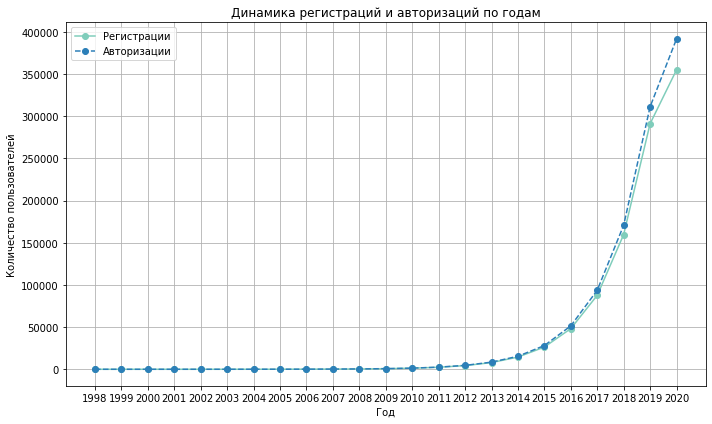

Среднее количество регистраций за весь период: 43478.26
Среднее количество авторизаций за весь период: 46998.39

Год с максимальным количеством регистраций: 2020 (354963 регистраций)
Год с минимальным количеством регистраций: 1998 (1 регистраций)

Год с максимальным количеством авторизаций: 2020 (391646 авторизаций)
Год с минимальным количеством авторизаций: 1998 (1 авторизаций)

Год с максимальными регистрациями и авторизациями совпадает: 2020
Год с минимальными регистрациями и авторизациями совпадает: 1998


In [9]:
# Теперь проанализируем наш массив данных и посмотрим количество регистраций и авторизаций за каждый год
def plot_yearly_stats(merged_data):
    
    """
    Рассчитывает общее количество регистраций и авторизаций по годам, строит линейный график,
    а также выводит года с максимальной и минимальной суммой регистраций и авторизаций,
    а также средние значения за весь период.
    
    Аргументы:
        merged_data(pd.DataFrame): Данные регистрации и авторизации.
    
    Возвращает:
        dict: Результаты анализа, включая статистику и совпадения.
    """
    
    # Группируем данные по годам и считаем уников для каждой категории
    reg_counts = merged_data.groupby(merged_data['reg_datetime'].dt.year).uid.nunique()
    auth_counts = merged_data.groupby(merged_data['auth_datetime'].dt.year).uid.nunique()

    # Создаем линейный график в выбранной палитре YlGnBu
    color_reg = "#7fcdbb"
    color_auth = "#2c7fb8"
    
    plt.figure(figsize=(10, 6))
    plt.plot(reg_counts.index, reg_counts.values, label="Регистрации", marker="o", linestyle="-", color=color_reg)
    plt.plot(auth_counts.index, auth_counts.values, label="Авторизации", marker="o", linestyle="--", color=color_auth)
    plt.title("Динамика регистраций и авторизаций по годам")
    plt.xlabel("Год")
    plt.ylabel("Количество пользователей")
    plt.xticks(reg_counts.index)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # Теперь займемся подсчетами и выводом получившихся данных. Будет нудновато.
    
    # Считаем среднее количество регистраций и авторизаций за все время
    avg_reg = reg_counts.mean()
    avg_auth = auth_counts.mean()

    print(f"Среднее количество регистраций за весь период: {avg_reg:.2f}")
    print(f"Среднее количество авторизаций за весь период: {avg_auth:.2f}\n")

    # Считаем года с максимальными и минимальными показателями регистрации
    max_reg_year = reg_counts.idxmax()
    min_reg_year = reg_counts.idxmin()
    max_reg = reg_counts.max()
    min_reg = reg_counts.min()

    print(f"Год с максимальным количеством регистраций: {max_reg_year} ({max_reg} регистраций)")
    print(f"Год с минимальным количеством регистраций: {min_reg_year} ({min_reg} регистраций)\n")

    # Считаем года с максимальными и минимальными показателями авторизации
    max_auth_year = auth_counts.idxmax()
    min_auth_year = auth_counts.idxmin()
    max_auth = auth_counts.max()
    min_auth = auth_counts.min()

    print(f"Год с максимальным количеством авторизаций: {max_auth_year} ({max_auth} авторизаций)")
    print(f"Год с минимальным количеством авторизаций: {min_auth_year} ({min_auth} авторизаций)\n")

    # Проверяем, совпадают ли эти года друг с другом
    matching_years = {
        "max_reg_and_auth_year": max_reg_year if max_reg_year == max_auth_year else None,
        "min_reg_and_auth_year": min_reg_year if min_reg_year == min_auth_year else None
    }

    if matching_years["max_reg_and_auth_year"]:
        print(f"Год с максимальными регистрациями и авторизациями совпадает: {matching_years['max_reg_and_auth_year']}")
    else:
        print("Год с максимальными регистрациями и авторизациями не совпадает.\n")

    if matching_years["min_reg_and_auth_year"]:
        print(f"Год с минимальными регистрациями и авторизациями совпадает: {matching_years['min_reg_and_auth_year']}")
    else:
        print("Год с минимальными регистрациями и авторизациями не совпадает.")

    # Выводим результаты в виде словаря
    return {
        "avg_reg": avg_reg,
        "avg_auth": avg_auth,
        "max_reg_year": max_reg_year,
        "min_reg_year": min_reg_year,
        "max_auth_year": max_auth_year,
        "min_auth_year": min_auth_year,
        "matching_years": matching_years,
        "max_reg_and_auth_year": matching_years["max_reg_and_auth_year"]
    }
    
# Вызываем функцию и смотрим, что получилось
results_yearly = plot_yearly_stats(merged_data)

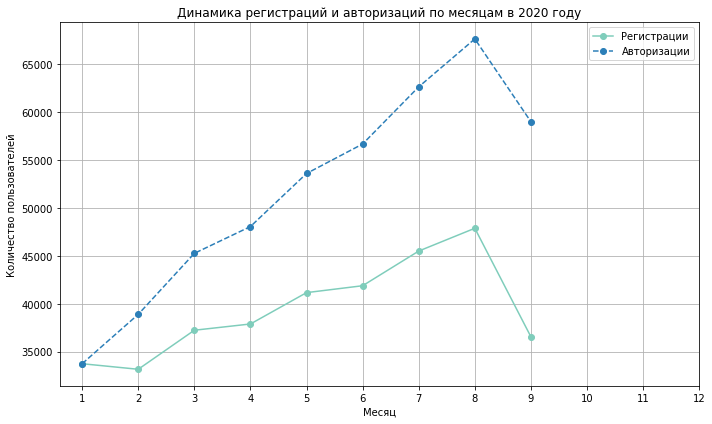

Среднее количество регистраций в 2020 году: 39440.33
Среднее количество авторизаций в 2020 году: 51728.89

Месяц с максимальным количеством регистраций: 8 (47882 регистраций)
Месяц с минимальным количеством регистраций: 2 (33152 регистраций)

Месяц с максимальным количеством авторизаций: 8 (67662 авторизаций)
Месяц с минимальным количеством авторизаций: 1 (33733 авторизаций)

Месяц с максимальными регистрациями и авторизациями совпадает: 8
Месяц с минимальными регистрациями и авторизациями не совпадает.


In [10]:
# Нам повезло: в одни и те же года были максимальные и минимальный пики регистрации и авторизации.
# Пронализируем месяцы в 2020 году также, как анализировали года (учитываем,что данные охватывают не весь год)

def plot_monthly_stats(merged_data, results_yearly):
    """
    Рассчитывает количество регистраций и авторизаций по месяцам для года с максимальным количеством регистраций
    и авторизаций, строит линейный график, а также проверяет совпадение месяцев с максимальными и минимальными
    регистрациями и авторизациями.

    Аргументы:
        merged_data(pd.DataFrame): Данные регистрации и авторизации.
        results_yearly(dict): Результаты анализа по годам, содержащие ключ max_reg_and_auth_year.

    Возвращает:
        dict: Результаты анализа, включая статистику, месяцы с максимумами/минимумами и совпадения.
    """
    # Достаем год с максимальными показателями из предыдущей функции
    max_reg_and_auth_year = results_yearly["max_reg_and_auth_year"]

    # Фильтруем полученные данные
    max_year_data = merged_data[merged_data['reg_datetime'].dt.year == max_reg_and_auth_year]

    # Группируем данные и считаем уников
    reg_month_counts = max_year_data.groupby(max_year_data['reg_datetime'].dt.month).uid.nunique()
    auth_month_counts = max_year_data.groupby(max_year_data['auth_datetime'].dt.month).uid.nunique()

    # Создаем линейный график в выбранной палитре YlGnBu
    color_reg = "#7fcdbb"
    color_auth = "#2c7fb8"    
    
    plt.figure(figsize=(10, 6))
    plt.plot(reg_month_counts.index, reg_month_counts.values, label="Регистрации", marker="o", linestyle="-", color=color_reg)
    plt.plot(auth_month_counts.index, auth_month_counts.values, label="Авторизации", marker="o", linestyle="--", color=color_auth)
    plt.title(f"Динамика регистраций и авторизаций по месяцам в {max_reg_and_auth_year} году")
    plt.xlabel("Месяц")
    plt.ylabel("Количество пользователей")
    plt.xticks(range(1, 13))
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # Теперь займемся подсчетами и выводом получившихся данных. Будет нудновато (снова).

    # Считаем среднее количество регистраций и авторизаций по месяцам
    avg_reg_month = reg_month_counts.mean()
    avg_auth_month = auth_month_counts.mean()

    print(f"Среднее количество регистраций в {max_reg_and_auth_year} году: {avg_reg_month:.2f}")
    print(f"Среднее количество авторизаций в {max_reg_and_auth_year} году: {avg_auth_month:.2f}\n")

    # Месяцы с максимальным и минимальным количеством регистраций
    max_reg_month = reg_month_counts.idxmax()
    min_reg_month = reg_month_counts.idxmin()
    max_reg = reg_month_counts.max()
    min_reg = reg_month_counts.min()

    print(f"Месяц с максимальным количеством регистраций: {max_reg_month} ({max_reg} регистраций)")
    print(f"Месяц с минимальным количеством регистраций: {min_reg_month} ({min_reg} регистраций)\n")

    # Месяцы с максимальным и минимальным количеством авторизаций
    max_auth_month = auth_month_counts.idxmax()
    min_auth_month = auth_month_counts.idxmin()
    max_auth = auth_month_counts.max()
    min_auth = auth_month_counts.min()

    print(f"Месяц с максимальным количеством авторизаций: {max_auth_month} ({max_auth} авторизаций)")
    print(f"Месяц с минимальным количеством авторизаций: {min_auth_month} ({min_auth} авторизаций)\n")

    # Проверка на совпадение месяцев с максимумами/минимумами
    matching_months = {
        "max_reg_and_auth_month": max_reg_month if max_reg_month == max_auth_month else None,
        "min_reg_and_auth_month": min_reg_month if min_reg_month == min_auth_month else None
    }

    if matching_months["max_reg_and_auth_month"]:
        print(f"Месяц с максимальными регистрациями и авторизациями совпадает: {matching_months['max_reg_and_auth_month']}")
    else:
        print("Месяц с максимальными регистрациями и авторизациями не совпадает.\n")

    if matching_months["min_reg_and_auth_month"]:
        print(f"Месяц с минимальными регистрациями и авторизациями совпадает: {matching_months['min_reg_and_auth_month']}")
    else:
        print("Месяц с минимальными регистрациями и авторизациями не совпадает.")

    # Выводим результаты в виде словаря
    return {
        "avg_reg_month": avg_reg_month,
        "avg_auth_month": avg_auth_month,
        "max_reg_month": max_reg_month,
        "min_reg_month": min_reg_month,
        "max_auth_month": max_auth_month,
        "min_auth_month": min_auth_month,
        "matching_months": matching_months
    }

# Вызываем функцию и смотрим, что получилось
results_monthly = plot_monthly_stats(merged_data, results_yearly)

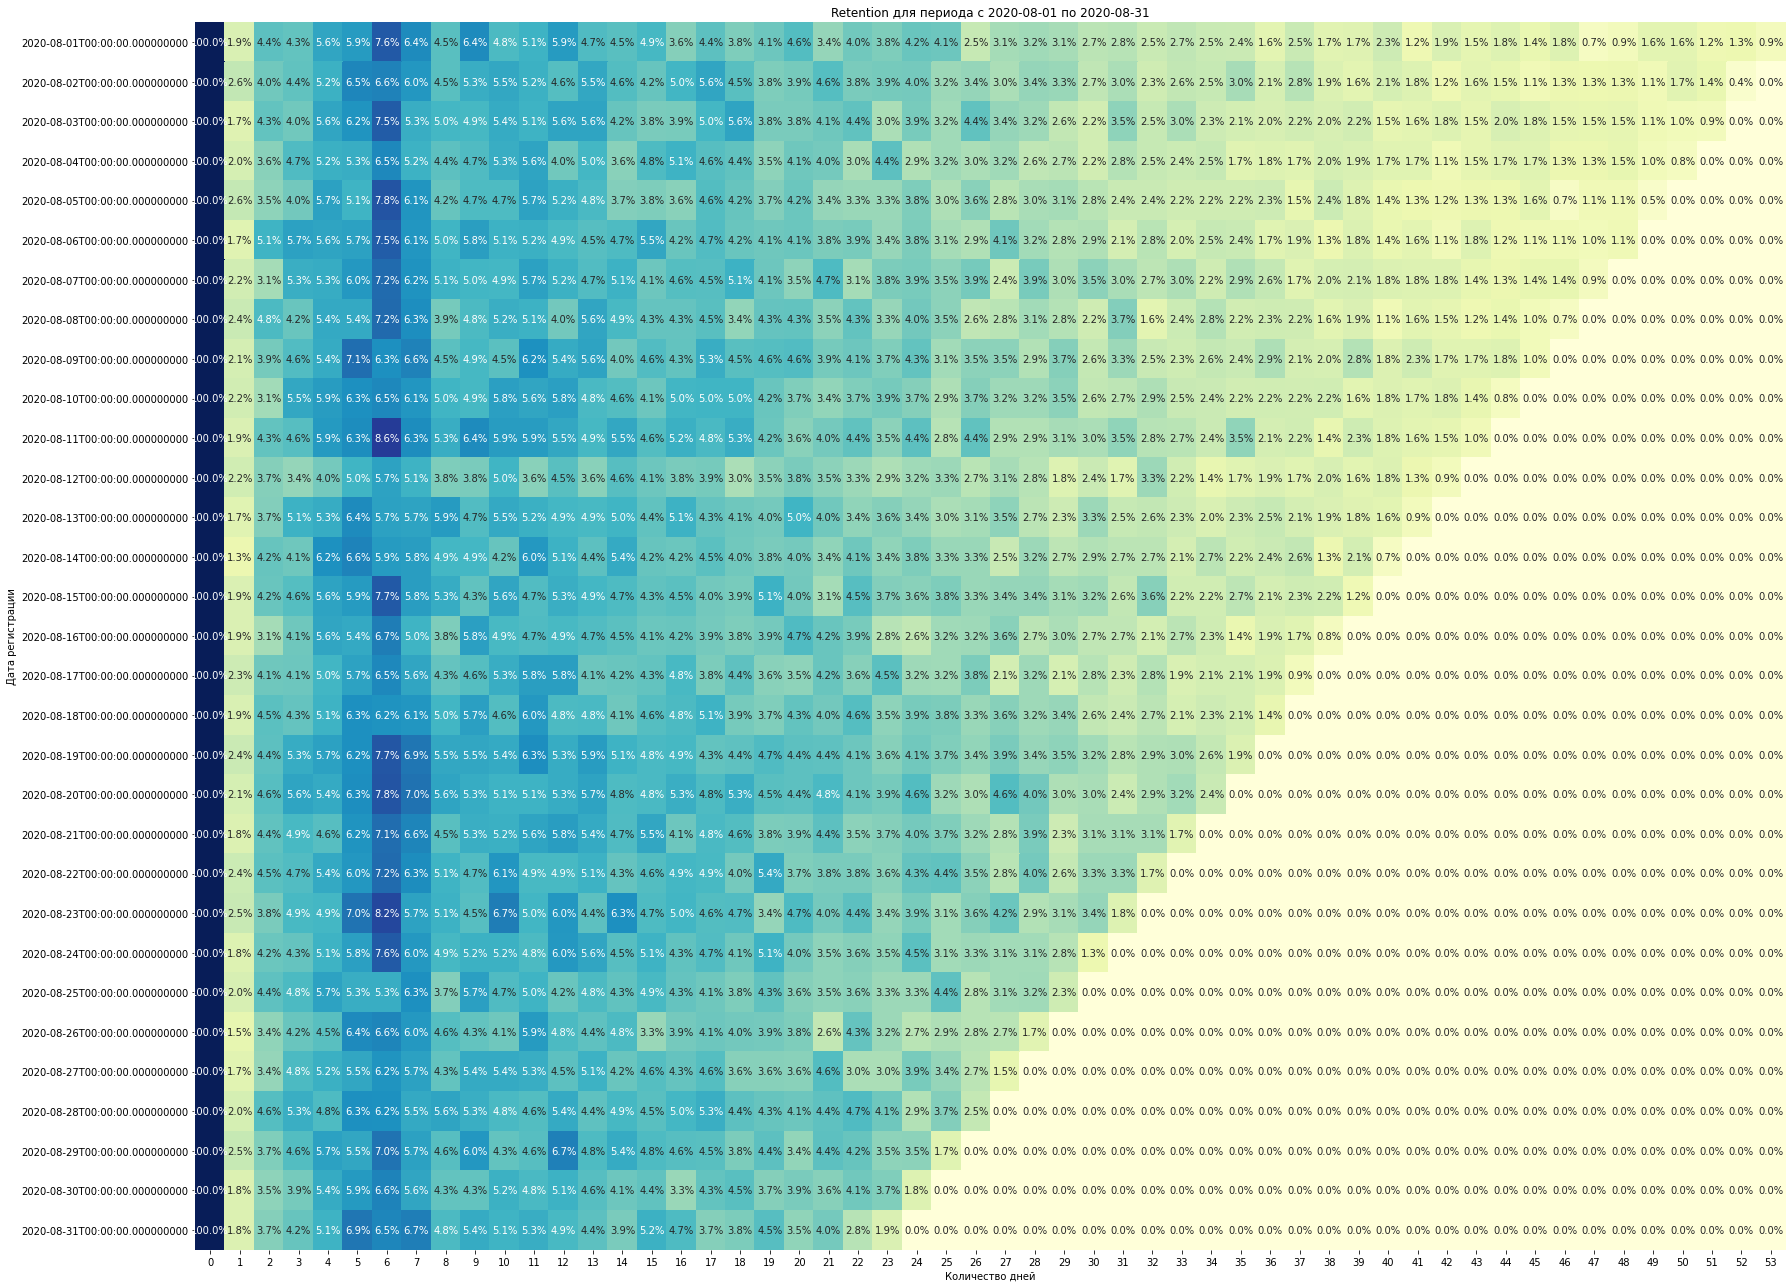

date_diff,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
reg_datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-01,1.0,0.019244,0.044459,0.043132,0.055740,0.059058,0.076311,0.063703,0.045123,0.063703,...,0.017916,0.013935,0.017916,0.007299,0.009290,0.015926,0.015926,0.011944,0.012608,0.008626
2020-08-02,1.0,0.025845,0.040424,0.043738,0.051690,0.064944,0.066269,0.060305,0.045063,0.053015,...,0.014579,0.010603,0.013254,0.012591,0.013254,0.010603,0.016567,0.013917,0.003976,0.000000
2020-08-03,1.0,0.017196,0.042989,0.040344,0.055556,0.061508,0.075397,0.052910,0.049603,0.048942,...,0.019841,0.017857,0.015212,0.014550,0.015212,0.011243,0.009921,0.009259,0.000000,0.000000
2020-08-04,1.0,0.020476,0.035667,0.046896,0.052180,0.052840,0.064729,0.051519,0.044254,0.046896,...,0.016513,0.017173,0.013210,0.013210,0.014531,0.009908,0.007926,0.000000,0.000000,0.000000
2020-08-05,1.0,0.025709,0.034937,0.040211,0.057350,0.050758,0.077785,0.061305,0.042189,0.047462,...,0.012525,0.015821,0.006592,0.010547,0.010547,0.005274,0.000000,0.000000,0.000000,0.000000
2020-08-06,1.0,0.017117,0.050691,0.057275,0.055958,0.057275,0.075049,0.060566,0.050033,0.057933,...,0.011850,0.011192,0.011192,0.009875,0.011192,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-07,1.0,0.021682,0.030880,0.052562,0.053219,0.059790,0.071616,0.061761,0.051248,0.049934,...,0.013141,0.014455,0.014455,0.008541,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-08,1.0,0.024278,0.047900,0.041995,0.054462,0.054462,0.072178,0.062992,0.039370,0.047900,...,0.013780,0.009843,0.007218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-08-09,1.0,0.020956,0.039293,0.046496,0.053700,0.070727,0.062868,0.066143,0.044532,0.049116,...,0.017682,0.009823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
# Удача снова на нашей стороне: максимальные показатели были зафиксированы в один и тот же месяц. Время строить тепловую карту.

# Достаем год и месяц с максимальными значениями из результатов анализа
year = results_yearly["max_reg_and_auth_year"]
month = results_monthly["max_reg_month"]

# Создаем дату для retention
date_from = pd.Timestamp(year=year, month=month, day=1)

# Вызываем count_retention с этой датой
pivot = count_retention(merged_data, date_from, 30)
pivot 

## Задание 2
Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.

Какой набор предложений можно считать лучшим? Какие метрики стоит проанализировать для принятия правильного решения и как?

In [24]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


# Загружаем данные
pro_2 = pd.read_csv('Проект_1_Задание_2.csv', sep=';')

In [25]:
# Начнем с проверки данных, на всякий случай
def check_data(df, df_name):
    
    """
    Проверяет данные в датасете и отображает результаты.
    Аргументы:
        df (pd.DataFrame): Датасет для проверки.
        df_name(str): Имя датасета для отображения.
    
    Возвращает: 
        Информация о датасетах: размер, пропуски, дубликаты, уникальные значения, типы и описание данных, общая информация.
    """
    
    print(f"--- Проверка данных: {df_name} ---")
    print(f"Размеры данных: {df.shape}")
    
    print("\nПропуски:")
    if df.isna().sum().sum() > 0:
        print(df.isna().sum())
    else:
        print("Пропусков нет")
    
    print("\nДубликаты:")
    duplicated_count = df.duplicated().sum()
    if duplicated_count > 0:
        print(f"Найдено дубликатов: {duplicated_count}")
    else:
        print("Дубликатов нет")
    
    print("\nУникальные значения по столбцам:")
    print(df.nunique())
    
    print("\nТипы данных:")
    print(df.dtypes)
    
    print("\nОписание данных:")
    print(df.describe())
    print("-" * 40)
    
    print("\nОбщая информация:")
    df.info()
    
# Запускаем проверку данных, если это необходимо
perform_checks = input("Выполнить проверку данных? (y/n): ").strip().lower() == 'y'
if perform_checks:
    check_data(pro_2, "Данные авторизации (pro_2)")


Выполнить проверку данных? (y/n): n


In [26]:
# С данными все хорошо. Так что можно начать разбор задачи.

In [27]:
# Сразу разделим наши данные по группам — контрольной и тестовой.
control_group = pro_2.query('testgroup == "a"')
test_group = pro_2.query('testgroup == "b"')

Стоит отметить, что в задаче явно не указано, какую цель мы преследуем при анализе. 

Поэтому будем считать, что мы просто сравниваем две группы с целью выявления оптимального решения.
Также мы не будем учитывать возможные проблемы при проведении A/B-тестирования, так как многие параметры мы не знаем.

Исходя из этого, для расчетов нам понадобятся три базовые метрики:
    
    • ARPU — показатель средней выручки на одного пользователя. 
        Считается по формуле: Доход/число пользователей.
    • ARPPU — средний доход на платящего пользователя.
        Считается по формуле: Общий доход/Количество платящих пользователей.
    • CR — конверсия, доля пользователей, совершивших хотя бы одну покупку.
        Считается по формуле: Количество платящих пользователей/Все пользователи.
            
В условиях имеющихся данных и условий, мы можем сформировать базовые гипотезы:

    • H0 — Между исследуемыми наборами акционных предложений нет статистически значимой разницы
        по указанным метрикам.
    • H1 — Один из наборов акционных предложений показывает статистически значимые улучшения
        (или  отсутствие ухудшений) по указанным метрикам.

К сожалению, более конкретные и точечные гипотезы мы не можем сформировать из-за отсутствия дополнительных данных.

Проверим распределение пользователей по группам.

In [28]:
# Считаем количество уникальных пользователей в каждой группе
count_control = control_group.user_id.nunique()
count_test = test_group.user_id.nunique()

print(f"Уникальные пользователи в контрольной группе: {count_control}")
print(f"Уникальные пользователи в тестовой группе: {count_test}\n")

# Считаем разницу между группами в процентах
differ = abs(count_control - count_test) / max(count_control, count_test) * 100
print(f"Разница между группами: {differ:.2f}%")

# Проверим на допустимость разницы
if differ > 10:
    print("Внимание: Разница между группами превышает 10%, это может вызвать смещение результатов.")
else:
    print("Разница между группами находится в допустимых пределах.\n")

# Считаем медианы для обеих групп
cnt_med = control_group.query('revenue > 0').revenue.median()
tst_med = test_group.query('revenue > 0').revenue.median()

print(f"Медианное значение для контрольной группы: {cnt_med}")
print(f"Медианное значение для тестовой группы: {tst_med}\n")

# Проверим фильтрацию по доходу выше медианы
high_control_users = control_group.query('revenue > @cnt_med')
high_test_users = test_group.query('revenue > @tst_med')

# Считаем уникальных пользователей
high_control = high_control_users.user_id.nunique()
high_test = high_test_users.user_id.nunique()

print(f"Уникальные пользователи с доходом выше медианного в контрольной группе: {high_control}")
print(f"Уникальные пользователи с доходом выше медианного в тестовой группе: {high_test}\n")

# Считаем долю пользователей с доходом выше медианы
prop_high_control = high_control / count_control * 100
prop_high_test = high_test / count_test * 100

print(f"Доля пользователей с доходом выше медианы в контрольной группе: {prop_high_control:.2f}%")
print(f"Доля пользователей с доходом выше медианы в тестовой группе: {prop_high_test:.2f}%\n")

Уникальные пользователи в контрольной группе: 202103
Уникальные пользователи в тестовой группе: 202667

Разница между группами: 0.28%
Разница между группами находится в допустимых пределах.

Медианное значение для контрольной группы: 311.0
Медианное значение для тестовой группы: 3022.0

Уникальные пользователи с доходом выше медианного в контрольной группе: 962
Уникальные пользователи с доходом выше медианного в тестовой группе: 902

Доля пользователей с доходом выше медианы в контрольной группе: 0.48%
Доля пользователей с доходом выше медианы в тестовой группе: 0.45%



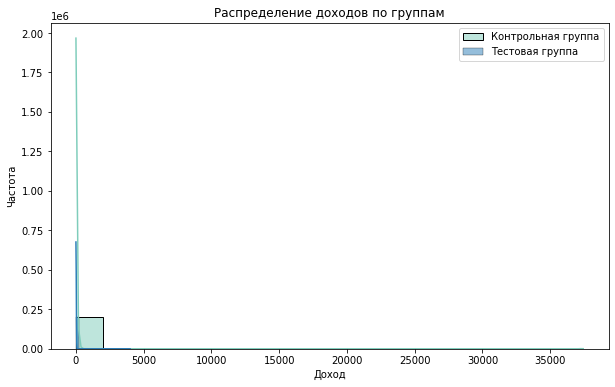

In [29]:
# Гистограмма для доходов в группах в выбранной палитре YlGnBu
color_control = "#7fcdbb"
color_test = "#2c7fb8"

plt.figure(figsize=(10, 6))
sns.histplot(control_group['revenue'], kde=True, color=color_control, label='Контрольная группа')
sns.histplot(test_group['revenue'], kde=True, color=color_test, label='Тестовая группа')
plt.legend()
plt.title("Распределение доходов по группам")
plt.xlabel("Доход")
plt.ylabel("Частота")
plt.show()

Промежуточные выводы:
    
    • Разница в количестве уникальных пользователей в группах не может оказать существенного влияния на дальнейшие расчеты.
    • Медианные значения в группах сильно отличаются друг от друга.   
    • Количество уникальных пользователей выше медианного дохода примерно одинаковая.
    • В группах значительная разница в распределении доходов. 
        Возможно, это связано с более платежеспособными пользователями.

Проверим данные на аномалии и выбросы.

In [30]:
# Исключаем пользователей с нулевым доходом, чтобы не искажать данные
control_group_non_zero = control_group[control_group['revenue'] > 0]
test_group_non_zero = test_group[test_group['revenue'] > 0]

# Считаем количество выбросов для контрольной группы
q1_control = control_group_non_zero['revenue'].quantile(0.25)
q3_control = control_group_non_zero['revenue'].quantile(0.75)
iqr_control = q3_control - q1_control
lower_bound_control = q1_control - 1.5 * iqr_control
upper_bound_control = q3_control + 1.5 * iqr_control

outliers_control = control_group_non_zero[
    (control_group_non_zero['revenue'] < lower_bound_control) | 
    (control_group_non_zero['revenue'] > upper_bound_control)
]

# Считаем количество выбросов для тестовой группы
q1_test = test_group_non_zero['revenue'].quantile(0.25)
q3_test = test_group_non_zero['revenue'].quantile(0.75)
iqr_test = q3_test - q1_test
lower_bound_test = q1_test - 1.5 * iqr_test
upper_bound_test = q3_test + 1.5 * iqr_test

outliers_test = test_group_non_zero[
    (test_group_non_zero['revenue'] < lower_bound_test) | 
    (test_group_non_zero['revenue'] > upper_bound_test)
]

print(f"Количество выбросов в контрольной группе: {outliers_control.shape[0]}")
print(f"Количество выбросов в тестовой группе: {outliers_test.shape[0]}\n")

# Считаем вклад выбросов в общий доход
outliers_contribution_control = outliers_control['revenue'].sum() / control_group_non_zero['revenue'].sum() * 100
outliers_contribution_test = outliers_test['revenue'].sum() / test_group_non_zero['revenue'].sum() * 100

print(f"Вклад выбросов в общий доход контрольной группы: {outliers_contribution_control:.2f}%")
print(f"Вклад выбросов в общий доход тестовой группы: {outliers_contribution_test:.2f}%")

Количество выбросов в контрольной группе: 123
Количество выбросов в тестовой группе: 0

Вклад выбросов в общий доход контрольной группы: 89.37%
Вклад выбросов в общий доход тестовой группы: 0.00%


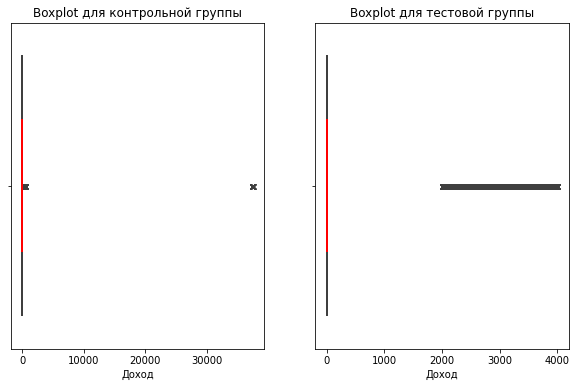

In [31]:
# Boxplot для выявления выбросов в доходах
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(
    x=control_group['revenue'], 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .7, .9, .5)},
    medianprops={"color": "r", "linewidth": 2}
)
plt.title('Boxplot для контрольной группы')
plt.xlabel('Доход')

plt.subplot(1, 2, 2)
sns.boxplot(
    x=test_group['revenue'], 
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .7, .9, .5)},
    medianprops={"color": "r", "linewidth": 2}
)
plt.title('Boxplot для тестовой группы')
plt.xlabel('Доход')
plt.show()

На данном этапе можно сказать, что:

    • В контрольной группе на небольшую группу людей приходится почти 90% от общего дохода. 
    • Выбросы в контрольной группе могут сильно исказить средний доход. 
        Это усложняет сравнение с тестовой группой.    
    • Поэтому лучше обратиться к медианным значениям по группам. Что уже сделано.
    • Попробуем посчитать метрики.

In [32]:
# Считаем ARPU
arpu_control = round(control_group.revenue.sum() / control_group.user_id.nunique(), 2)
arpu_test = round(test_group.revenue.sum() / test_group.user_id.nunique(), 2)

print(f"ARPU для контрольной группы {arpu_control}")
print(f"ARPU для тестовой группы {arpu_test}\n")

# Считаем ARPPU
arppu_control = round(control_group.revenue.sum() / control_group[control_group['revenue'] > 0].user_id.nunique(), 2)
arppu_test = round(test_group.revenue.sum() / test_group[test_group['revenue'] > 0].user_id.nunique(), 2)

print(f"ARPPU для контрольной группы {arppu_control}")
print(f"ARPPU для тестовой группы {arppu_test}\n")

# Считаем CR
cr_control = round(control_group.query('revenue > 0').user_id.nunique() / control_group.user_id.nunique() * 100, 2)
cr_test = round(test_group.query('revenue > 0').user_id.nunique() / test_group.user_id.nunique() * 100, 2)

print(f"CR для контрольной группы {cr_control}")
print(f"CR для тестовой группы {cr_test}")

ARPU для контрольной группы 25.41
ARPU для тестовой группы 26.75

ARPPU для контрольной группы 2664.0
ARPPU для тестовой группы 3003.66

CR для контрольной группы 0.95
CR для тестовой группы 0.89


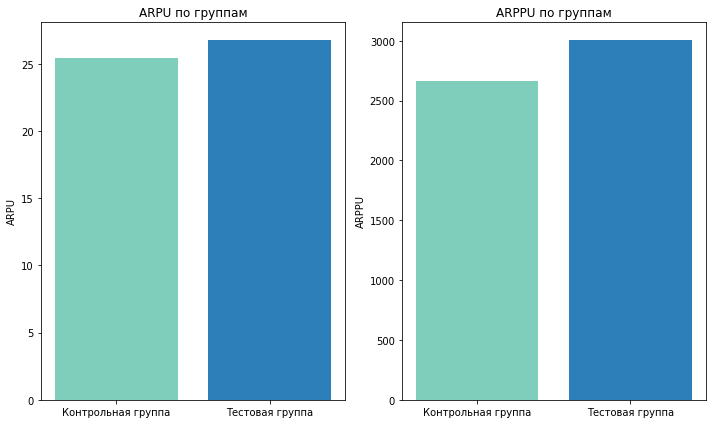

In [21]:
# Столбчатые диаграммы для ARPU и ARPPU в выбранной палитре YlGnBu
color_reg = "#7fcdbb"
color_auth = "#2c7fb8"

colors_arpu = [color_reg, color_auth]
colors_arppu = [color_reg, color_auth]

groups = ['Контрольная группа', 'Тестовая группа']
arpu_values = [arpu_control, arpu_test]
arppu_values = [arppu_control, arppu_test]

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].bar(groups, arpu_values, color=colors_arpu)
ax[0].set_title('ARPU по группам')
ax[0].set_ylabel('ARPU')
ax[1].bar(groups, arppu_values, color=colors_arppu)
ax[1].set_title('ARPPU по группам')
ax[1].set_ylabel('ARPPU')
plt.tight_layout()
plt.show()

Промежуточные выводы:
    
    • ARPU у тестовой группе больше. Средняя выручка на одного пользователя выросла.
    • ARPPU у тестовой группы заметно больше. Средний доход на платящего пользователя выросла.
    • CR у контрольной группы больше. Конверсия снизилась. 

Посчитаем нормальность метрик по тесту Д’Агостино и Пирсона. Это связано с тем, что у нас большой объем данных, на которых тест Шапиро-Уилка может дать погрешности даже при небольших отклонениях.

In [33]:
dagostino_control = stats.normaltest(control_group['revenue'])
dagostino_test = stats.normaltest(test_group['revenue'])

print("\nТест Д’Агостино и Пирсона:")
print(f"Контрольная группа: {dagostino_control.statistic:.4f}, p-value = {dagostino_control.pvalue:.4f}")
print(f"Тестовая группа: {dagostino_test.statistic:.4f}, p-value = {dagostino_test.pvalue:.4f}")


Тест Д’Агостино и Пирсона:
Контрольная группа: 585152.7313, p-value = 0.0000
Тестовая группа: 326622.3954, p-value = 0.0000


Тест показал, что у нас есть существенное отклонение от нормального распределения. Но доверять данным, полученным в t-test, все еще можно. 
Поэтому проведем статистическую проверку каждой метрики через t-test (для ARPU и ARPPU) и ХИ-квадрат (для CR).


In [34]:
# Применяем t-test для ARPU
t_arpu, p_arpu = stats.ttest_ind(
    control_group[control_group['revenue'] > 0]['revenue'] / control_group[control_group['revenue'] > 0].user_id.nunique(),
    test_group[test_group['revenue'] > 0]['revenue'] / test_group[test_group['revenue'] > 0].user_id.nunique()
)

# Применяем t-test для ARPPU
t_arppu, p_arppu = stats.ttest_ind(
    control_group[control_group['revenue'] > 0].groupby('user_id')['revenue'].sum(),
    test_group[test_group['revenue'] > 0].groupby('user_id')['revenue'].sum()
)

# Выводим результаты t-теста
print(f"Значения t-test для ARPU: t = {t_arpu:.4f}, p-value = {p_arpu:.4f}")
print(f"Значения t-test для ARPPU: t = {t_arppu:.4f}, p-value = {p_arppu:.4f}")

# Считаем хи-квадрат для CR
control_paying_cr = control_group.query('revenue > 0').user_id.nunique()
control_total_cr = control_group.user_id.nunique()

test_paying_cr = test_group.query('revenue > 0').user_id.nunique()
test_total_cr = test_group.user_id.nunique()

conversion_table = [
    [control_paying_cr, control_total_cr - control_paying_cr],
    [test_paying_cr, test_total_cr - test_paying_cr]
]

chi2, p_value, dof, expected = stats.chi2_contingency(conversion_table)
print(f"Хи-квадрат для CR: {chi2}, P-значение: {p_value}")

Значения t-test для ARPU: t = -2.5502, p-value = 0.0108
Значения t-test для ARPPU: t = -1.5917, p-value = 0.1115
Хи-квадрат для CR: 4.374729521260405, P-значение: 0.03647561892312613


Промежуточные выводы:

    • Для CR показатели оказались значимыми, для ARPU и ARPPU — нет.
    • Для ARPU и ARPPU мы не отклоняем H0, для CR — отклоняем.  

# Заключение

<h3>Гипотезы</h3>

H0 — Между исследуемыми наборами акционных предложений нет статистически значимой разницы по указанным метрикам:

Для ARPU: принимаем H0. Статистически значимых различий между группами нет.

Для ARPPU: принимаем H0. Статистически значимых различий между группами нет.

Для CR: не принимаем H0. Есть статистически значимые различия между группами.

Таким образом, <b>H0 принимается для ARPU и ARPPU, но не принимается для CR</b>.

<h3>Общий вывод</h3>

На основе полученных данных, тестовая группа не показала статистически значимый рост по ARPU и ARPPU, при том было зафиксировано снижение CR. Тестовая группа показала более высокую выручку, но тесты не показали статистически значимых изменений. 

Поэтому контрольная группа признается предпочтительнее, так как она показала рост по CR при статистически равных ARPPU и ARPU.

# Задание 3


В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?

Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?

<h3>Метрики для оценки результатов тематического события</h3>

    • Участие в событии (Participation Rate).
    • Процент завершенных событий (Completion Rate).
    • Среднее количество попыток (Average Attempts per Player).
    • Среднее время на завершение события (Average Time to Completion.
    • Ретеншн игроков, участвующих в событии (Event Retention Rate).
    • Экономический эффект (Revenue Impact).

<h3>Изменения в метриках после усложнения механики события</h3>

    • Время на уровне (Time per Level)
В усложненной механике важно отслеживать, сколько времени игроки тратят на прохождение одного уровня, чтобы оценить, как изменение сложности повлияло на скорость прохождения.

    • Процент игроков, откатившихся назад (Rollback Rate)
Это метрика, которая показывает, какой процент игроков столкнулся с откатом на предыдущие уровни. Она даст понимание того, насколько новая механика влияет на вовлеченность.

    • Процент завершения с откатами (Completion Rate with Rollbacks)
Это процент игроков, которые завершили событие, несмотря на откаты, что поможет понять, как изменение механики повлияло на общий результат.

    • Новые пути к успеху (Path to Completion Analysis)
Анализ путей, которые проходят игроки, учитывая откаты. Это поможет понять, как усложнение механики изменяет поведение игроков и какие стратегические изменения в механике могут помочь в оптимизации.

    • Среднее количество уровней, пройденных до отката (Average Levels Before Rollback)
Эта метрика помогает понять, сколько уровней игроки проходят, прежде чем сталкиваются с откатом, и помогает определить сложность механики.

    • Процент игроков, вернувшихся после откатов (Rollback Recovery Rate)
Это метрика, которая показывает, сколько игроков смогли вернуться к прогрессу после откатов. Высокий процент восстановления может свидетельствовать о том, что усложнение механики воспринято положительно.

    •  Ретеншн игроков с откатами (Retention of Players with Rollbacks)
Метрика позволяет отслеживать, насколько игроки, столкнувшиеся с откатами, возвращаются в игру в будущем. Это поможет понять, насколько изменения механики событий влияют на долгосрочную вовлеченность.

Также я бы предложила не отказываться от метрик для оценки результатов тематического события, чтобы анализ проводился по двум векторам:

    1. Анализ события в контексте других проведенных ивентов для сохранения динамики метрик и их отслеживания.
    2. Анализ с целью поиска корреляций между усложнением механик и динамикой уже существующих и отслеживаемых метрик.

Немаловажным будет учет контекста при реализации новых механик. Это могут быть как общественно-социальные факторы (праздники, выходные, месяцы с высокой загрузкой), так экономическо-политические (колебания курсов валют, стоимости устройств и разработки).